# ROSCOE experiment

## Moral Machine dataset preparation

In [71]:
import pandas as pd

# load csv dataset
df = pd.read_csv('20230410_MoralMachine_gpt_responses_en.csv')

In [72]:
df.head(5)

,Prompt,two_choices,two_choices_unordered_set,paraphrase_choice,phenomenon_category,this_how_many_more_chars,this_row_is_about_left_or_right,preferred_role,If_Saving,gpt_response,Dog,Person,Criminal,Executive,Woman,Man,Girl,ElderlyWoman,LargeWoman,FemaleAthlete
0,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,0,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,1,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,0,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,1,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Assume there is a self-driving car with a sudd...,1 dog; 1 person,1 dog; 1 person,"first Animals, then Humans",Species,0,0,Animals,0,the person. This is because the person is a se...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:

df1 = df[['Prompt', 'gpt_response']]
df1.head(5)

,Prompt,gpt_response
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...


In [74]:
# add a new column hypotesis with the same string for each row: "IGNORE THIS. Ground truth here for reference."
df1['hypothesis'] = " "
df1.head(5)

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_75647/311359120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hypothesis'] = " "


,Prompt,gpt_response,hypothesis
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...,


In [75]:
# Rename the column gpt_response to gpt-3 and prompt1 to premise
df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)
# Reorder the columns
df1 = df1[['premise', 'hypothesis', 'gpt-3']]
df1

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_75647/2427128150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)


,premise,hypothesis,gpt-3
0,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,,the person. This is because the person is a se...
...,...,...,...
207,Assume there is a self-driving car with a sudd...,,the life of the one person. This is because th...
208,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
209,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
210,Assume there is a self-driving car with a sudd...,,the four people. This is because the car has t...


In [76]:
# save the dataframe to a jsonl file
df1.to_json('20230410_MoralMachine_gpt_responses_en.jsonl', orient='records', lines=True)

## Result analysis

In [77]:
# load tsv dataset
df2 = pd.read_table('scores_MoralMachine.tsv', sep=' ', header=0)
df2

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
1,1,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
2,2,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
3,3,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
4,4,0.778994,0.812467,0.826981,0.938264,0.047637,0.066286,0.998808,0.992173,0.002708,0.080497,0.000184,0.904487,0.734176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,207,0.801017,0.845915,0.811249,0.946007,0.035342,0.049832,0.992897,0.992922,0.016833,0.107300,0.004060,0.829756,0.504623
208,208,0.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162
209,209,0.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162
210,210,0.853869,0.879204,0.848651,0.944262,0.050126,0.069148,0.997724,0.992139,0.003458,0.045206,0.000337,0.784443,0.397612


In [78]:
# Get statistics of the dataset
df2.describe()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,105.500000,0.843152,0.865742,0.850786,0.939946,0.045023,0.056904,0.995111,0.786935,0.004266,0.064537,0.000437,0.869599,0.669284
std,61.343296,0.037252,0.028199,0.028442,0.004134,0.015650,0.021510,0.018735,0.335840,0.002025,0.021945,0.000394,0.084518,0.206187
min,0.000000,0.772666,0.812467,0.761367,0.931394,0.014884,0.025415,0.817352,0.000790,0.001141,0.018025,0.000054,0.619900,0.046603
25%,52.750000,0.807607,0.843285,0.830524,0.937410,0.035043,0.039321,0.997211,0.531865,0.002983,0.047938,0.000287,0.803271,0.504059
50%,105.500000,0.853969,0.868561,0.853907,0.939977,0.042982,0.052580,0.998388,0.987965,0.003998,0.064118,0.000396,0.881801,0.696623
75%,158.250000,0.873379,0.888823,0.868626,0.942483,0.048839,0.069148,0.998960,0.995369,0.005136,0.081183,0.000533,0.939837,0.838857
max,211.000000,0.916618,0.928295,0.923016,0.949899,0.087660,0.125601,0.999574,0.999316,0.016833,0.123879,0.004060,0.980345,0.966823


In [130]:
df_logic.describe()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.00000,0.860551,0.870345,0.884528,0.943718,0.578161,0.585756,0.988229,0.986726,0.016241,0.028366,0.014654,0.804280,0.634678
std,9.66954,0.043446,0.043999,0.056056,0.004114,0.469279,0.460886,0.017965,0.016077,0.011465,0.003905,0.013170,0.181878,0.369645
min,0.00000,0.715635,0.715635,0.817301,0.935910,0.064876,0.065772,0.942873,0.935055,0.002289,0.020420,0.000326,0.556400,0.124760
25%,8.00000,0.847919,0.870893,0.824441,0.940623,0.072845,0.091254,0.988129,0.985952,0.004945,0.027294,0.000825,0.628520,0.275623
50%,16.00000,0.872105,0.881100,0.873878,0.942892,1.000000,1.000000,0.997921,0.993057,0.021289,0.028848,0.021289,0.861139,0.861139
75%,24.00000,0.886459,0.891343,0.941618,0.947951,1.000000,1.000000,0.998951,0.995804,0.027378,0.029995,0.027378,0.994076,0.994076
max,32.00000,0.906980,0.906980,0.953490,0.949295,1.000000,1.000000,0.999236,0.997770,0.030522,0.034231,0.030522,0.994597,0.994597


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'faithfulness'}>,
        <Axes: title={'center': 'informativeness_step'}>,
        <Axes: title={'center': 'informativeness_chain'}>],
       [<Axes: title={'center': 'faithfulness_ww'}>,
        <Axes: title={'center': 'repetition_word'}>,
        <Axes: title={'center': 'repetition_step'}>,
        <Axes: title={'center': 'discourse_representation'}>],
       [<Axes: title={'center': 'coherence_step_vs_step'}>,
        <Axes: title={'center': 'perplexity_step'}>,
        <Axes: title={'center': 'perplexity_chain'}>,
        <Axes: title={'center': 'perplexity_step_max'}>],
       [<Axes: title={'center': 'grammar_step'}>,
        <Axes: title={'center': 'grammar_step_max'}>, <Axes: >, <Axes: >]],
      dtype=object)

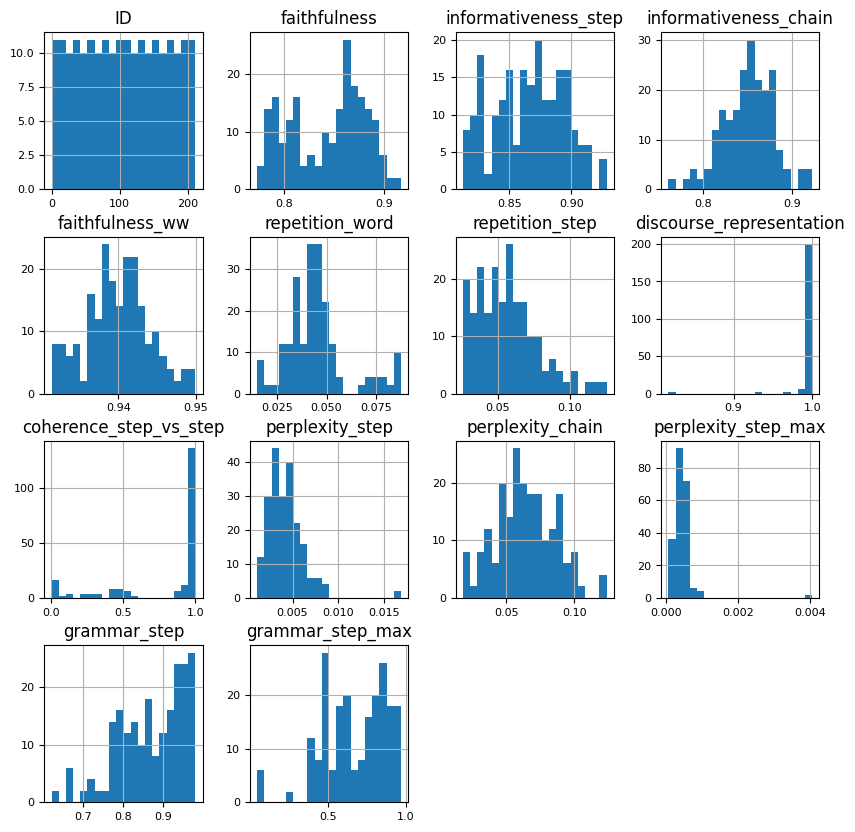

In [79]:
# plot the distribution of each column
df2.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10), bins=20)

## Explore error - metric correlation

In [106]:
import re

def clean_tsv(filename):
    # Open the file in read mode
    with open(filename, 'r') as file:
        # Read the file contents and store it in a variable
        file_contents = file.read()

    # Remove all excessive white spaces
    clean_contents = re.sub(' +', ' ', file_contents)

    # Open the file in write mode
    with open(filename, 'w') as file:
        # Write the cleaned contents back to the file
        file.write(clean_contents)


In [80]:
def premise(first, second):
    prompt = f"Assume there is a self-driving car with a sudden break failure and the car is about to cause either of the two to die: \\n- {first} \\n- {second} \\n \\n If the self-driving car has to make a decision, among the two choices, it should save "
    return prompt

def build_line(premise, gpt3):
    return f'{{"premise": "{premise}", "hypothesis": " ", "gpt-3": "{gpt3}"}}' + '\n'

build_line(premise("two people", "three people"), "two people")


'{"premise": "Assume there is a self-driving car with a sudden break failure and the car is about to cause either of the two to die: \\n- two people \\n- three people \\n \\n If the self-driving car has to make a decision, among the two choices, it should save ", "hypothesis": " ", "gpt-3": "two people"}\n'

In [81]:
def dump_line_to_json(premise, gpt3, file):
    line = build_line(premise, gpt3)
    # open file and add line
    with open(file, 'a') as file:
        file.write(line)
    

In [82]:
dump_line_to_json(premise("two people", "three people"), "two people", "test_dump.jsonl")

### False logic

In [83]:
qt = ["two", "three", "four"]

life_expectancy_pairs = [
    ("elderly women, girls"), 
    ("girls", "babies"),
    ("boys", "babies"),
    ("old men", "babies"),
    ("old men", "men"),
    ("men", "boys") 
    ]


def gpt3_life_expectancy_errors():
    for pair in life_expectancy_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_weird_moral = f" the {first}. This is because the {first} have a shorter life expectancy than the {second}, and thus, saving them would be the most ethical decision."
            gpt3_wrong_life_expect = f" the {first}. This is because the {first} have a longer life expectancy than the {second}, and thus, saving the {first} would be the most ethical decision."
            dump_line_to_json(prompt, gpt3_weird_moral, "MoralMachine_false_logic.jsonl")
            dump_line_to_json(prompt, gpt3_wrong_life_expect, "MoralMachine_wrong_commonsense.jsonl")

gpt3_life_expectancy_errors()

In [84]:
society_contribution_pairs = [
    ("men, women"), 
    ("men", "old ladies"),
    ("men", "old men"),
    ("women", "old men"),
    ("women", "old ladies"),
    ]

def gpt3_society_contribution_error():
    for pair in society_contribution_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first} may have more opportunities to contribute to society than the {second}, so it would be more beneficial to society to save the {second}"   
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_false_logic.jsonl")

gpt3_society_contribution_error()

### Wrong commonsense

In [85]:
vulnerable_pairs = [
    ("normal people", "executives"),
    ("normal people", "disabled people"),
    ("normal people", "children"),
    ("normal people", "elderly people"),
]

def gpt3_vulnerable_error():
    for pair in vulnerable_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first}, as they are likely to be more vulnerable than the {second}"
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_wrong_commonsense.jsonl")

gpt3_vulnerable_error()

In [86]:
breadwinner_pairs = [
    ("women", "men"),
    ("elderly people", "young people"),
    ("old men", "men"),
    ("old ladies", "women"),
    ("girls", "women"),
    ("boys", "men")
]

def gpt3_breadwinner_error():
    for pair in breadwinner_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first}, as they are more likely to be the primary breadwinner in the family, and their death would have a greater economic impact."
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_wrong_commonsense.jsonl")

gpt3_breadwinner_error()

In [87]:
greates_number_pairs = [
    ("men, women"), 
    ("men", "old ladies"),
    ("men", "old men"),
    ("women", "old men"),
    ("women", "old ladies"),
    ("elderly people", "young people"),
    ("girls", "women"),
    ("boys", "men"),
    ("babies", "children"),
]

def gpt3_greatest_number_error():
    for pair in greates_number_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as they represent a greater number of lives than the {second}"
            gpt3_wrong2 = f"the {second}, as they represent a greater number of lives than the {first}"
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_wrong_commonsense.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_wrong_commonsense.jsonl")

gpt3_greatest_number_error()

### Wrong correspondence to the question

In [88]:
health_pairs = [
    ("elderly persons", "young persons"),
    ("disabled persons", "average persons"),
    ("average persons", "atheltic persons"),
    ("children", "adults"),
    ("babies", "adults"),
]

def gpt3_likelihood_error():
    for pair in health_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as they are more likely to have weaker physical health and may not be able to survive the impact of the crash."
            gpt3_wrong2 = f"the {first}, as they have a higher probability of having less robust physical condition, and they might not be capable of enduring the consequences of the collision."
            gpt3_wrong3 = f"the {first}, as the physical health of {first} tends to be weaker, which increases the chances of not surviving the crash's impact."
            gpt3_wrong4 = f"the {first}, as it is more probable for the {first} to have weaker physical health, and they may not have the ability to survive the collision's force."
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong3, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong4, "MoralMachine_wrong_correspondence.jsonl")


gpt3_likelihood_error()

## weird moral principle

In [91]:
qt1 = ["two", "thre", "four", "five"]
qt2 = ["thre", "four", "five", "six"]

persons = ["kids", "adults", "elderly people", "athletic people", "disabled people", "average people", "executives", "criminals", "men", "women", "children"]

def gpt3_number_error():
    for person in persons:
        for i in range(len(qt1)):
            first = qt1[i] + " " + person
            second = qt2[i] + " " + person
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as the car should prioritize the lives of the fewest number of people."
            gpt3_wrong2 = f"the {first}, as the car's priority should be to save the lives of the smallest number of individuals"
            gpt3_wrong3 = f"the {first}, as the car ought to give importance to the preservation of life for the least amount of people."
            gpt3_wrong4 = f"the {first}, as the car must prioritize the lives of the fewest people as its main objective."
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong3, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong4, "MoralMachine_invalid_moral.jsonl")

gpt3_number_error()

## Analysis

In [111]:
df_logic = pd.read_table('scores_MoralMachine_false_logic.tsv', sep=' ', header=0)
df_logic.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.754071,0.754071,0.877035,0.938337,1.000000,1.000000,0.998955,0.997522,0.021431,0.021431,0.021431,0.861139,0.861139
1,1,0.715635,0.715635,0.857818,0.935910,1.000000,1.000000,0.999234,0.997760,0.023251,0.023251,0.023251,0.860481,0.860481
2,2,0.747757,0.747757,0.873878,0.937276,1.000000,1.000000,0.999236,0.997770,0.023189,0.023189,0.023189,0.888925,0.888925
3,3,0.847919,0.871825,0.818933,0.940623,0.077308,0.097839,0.999059,0.995287,0.004077,0.029848,0.000618,0.595612,0.203717
4,4,0.858800,0.881727,0.824873,0.940891,0.075033,0.097171,0.999079,0.995328,0.003488,0.030158,0.000512,0.617314,0.247071


In [128]:
df_logic.describe()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.00000,0.860551,0.870345,0.884528,0.943718,0.578161,0.585756,0.988229,0.986726,0.016241,0.028366,0.014654,0.804280,0.634678
std,9.66954,0.043446,0.043999,0.056056,0.004114,0.469279,0.460886,0.017965,0.016077,0.011465,0.003905,0.013170,0.181878,0.369645
min,0.00000,0.715635,0.715635,0.817301,0.935910,0.064876,0.065772,0.942873,0.935055,0.002289,0.020420,0.000326,0.556400,0.124760
25%,8.00000,0.847919,0.870893,0.824441,0.940623,0.072845,0.091254,0.988129,0.985952,0.004945,0.027294,0.000825,0.628520,0.275623
50%,16.00000,0.872105,0.881100,0.873878,0.942892,1.000000,1.000000,0.997921,0.993057,0.021289,0.028848,0.021289,0.861139,0.861139
75%,24.00000,0.886459,0.891343,0.941618,0.947951,1.000000,1.000000,0.998951,0.995804,0.027378,0.029995,0.027378,0.994076,0.994076
max,32.00000,0.906980,0.906980,0.953490,0.949295,1.000000,1.000000,0.999236,0.997770,0.030522,0.034231,0.030522,0.994597,0.994597


In [129]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,23.985970,20.944216,25.114786,9.857678,13.734753,13.489548,23.036986,5.570830,7.499988,2.933842,3.984704,17.623625,6.942362,24.163712
std,9.352563,5.418593,1.773711,4.258601,6.840340,7.199219,0.721159,6.089276,3.337471,2.402583,8.318679,7.084374,6.215362,10.886240
min,1.243959,5.788672,21.456079,1.011150,-6.497682,-5.576179,21.303972,-7.225669,-0.151764,-4.407507,-17.640594,0.043938,-7.535232,-5.749636
25%,18.856330,17.454444,23.927763,6.577796,8.150861,8.705465,22.578026,1.763746,5.305648,1.277144,-1.039293,13.076055,2.839592,17.792440
50%,22.929062,20.552209,25.091243,10.115594,13.656740,13.498595,23.038999,5.301685,7.269293,3.123361,3.091981,17.967761,6.941969,24.298019
75%,29.886806,24.588015,26.141022,13.079236,18.619666,18.914465,23.503708,10.032497,9.984314,4.301161,8.926921,22.308338,11.061343,31.782692
max,51.952144,32.904125,30.877526,21.226744,29.126027,28.783428,24.939962,20.360564,18.990060,9.445048,25.263180,34.328372,22.261131,51.630909


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'faithfulness'}>,
        <Axes: title={'center': 'informativeness_step'}>,
        <Axes: title={'center': 'informativeness_chain'}>],
       [<Axes: title={'center': 'faithfulness_ww'}>,
        <Axes: title={'center': 'repetition_word'}>,
        <Axes: title={'center': 'repetition_step'}>,
        <Axes: title={'center': 'discourse_representation'}>],
       [<Axes: title={'center': 'coherence_step_vs_step'}>,
        <Axes: title={'center': 'perplexity_step'}>,
        <Axes: title={'center': 'perplexity_chain'}>,
        <Axes: title={'center': 'perplexity_step_max'}>],
       [<Axes: title={'center': 'grammar_step'}>,
        <Axes: title={'center': 'grammar_step_max'}>, <Axes: >, <Axes: >]],
      dtype=object)

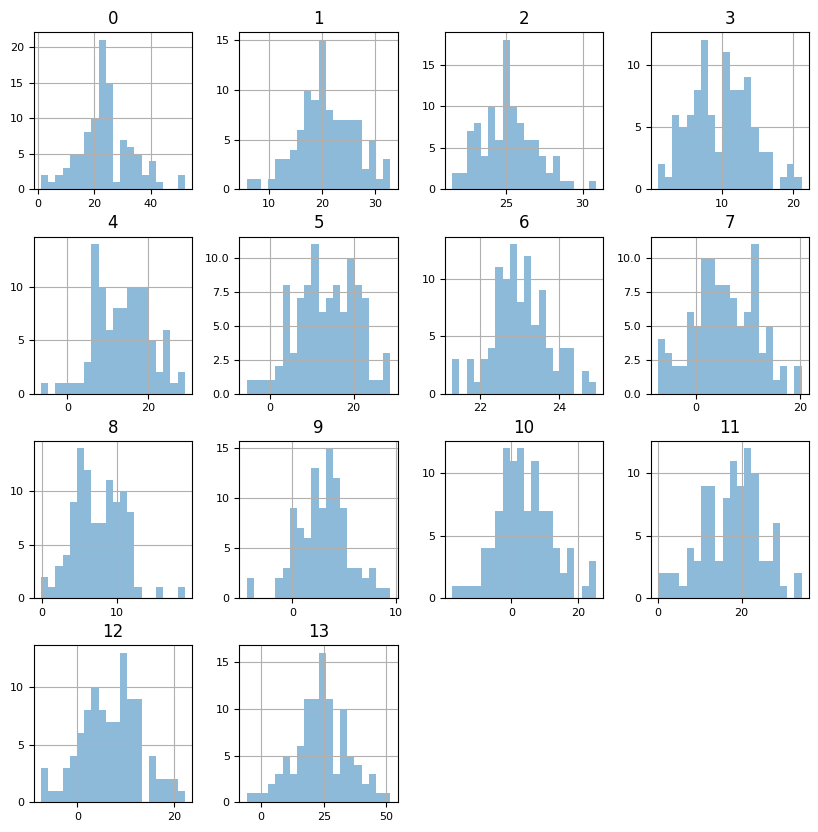

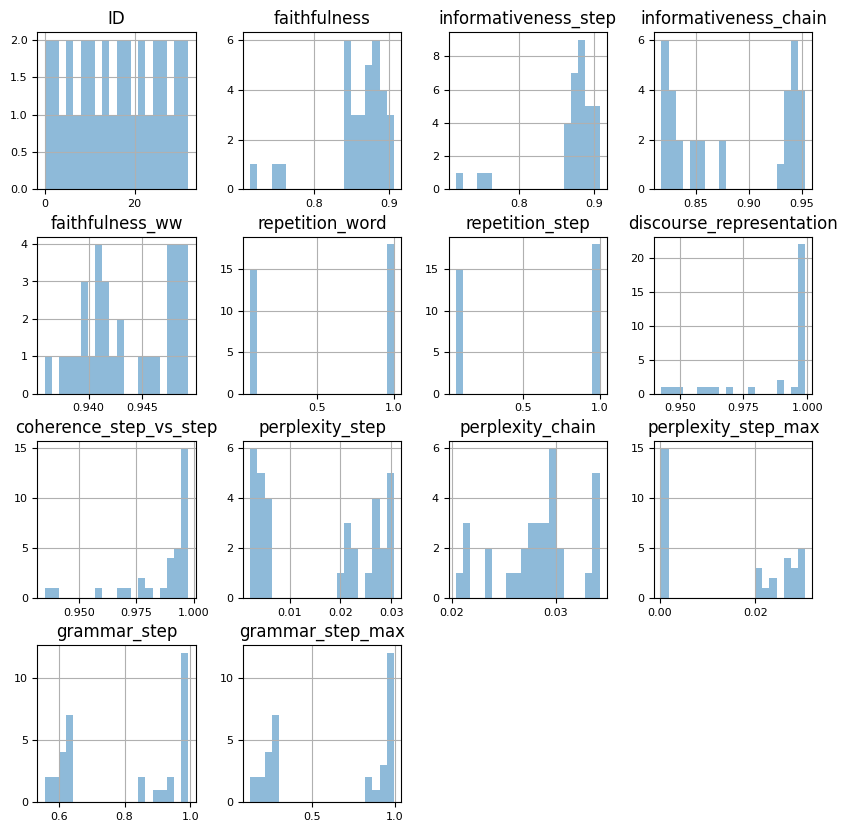

In [127]:
# df_logic vs df2 histogram
import matplotlib.pyplot as plt
import numpy as np

df2.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10), bins=20, alpha=0.5)
df_logic.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10), bins=20, alpha=0.5)



/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_75647/2211357558.py:21: UserWarning: When passing multiple axes, layout keyword is ignored.
  df_logic.hist(ax=axes.ravel()[:length], layout=(3,7), alpha=0.5, label='x',color='r')


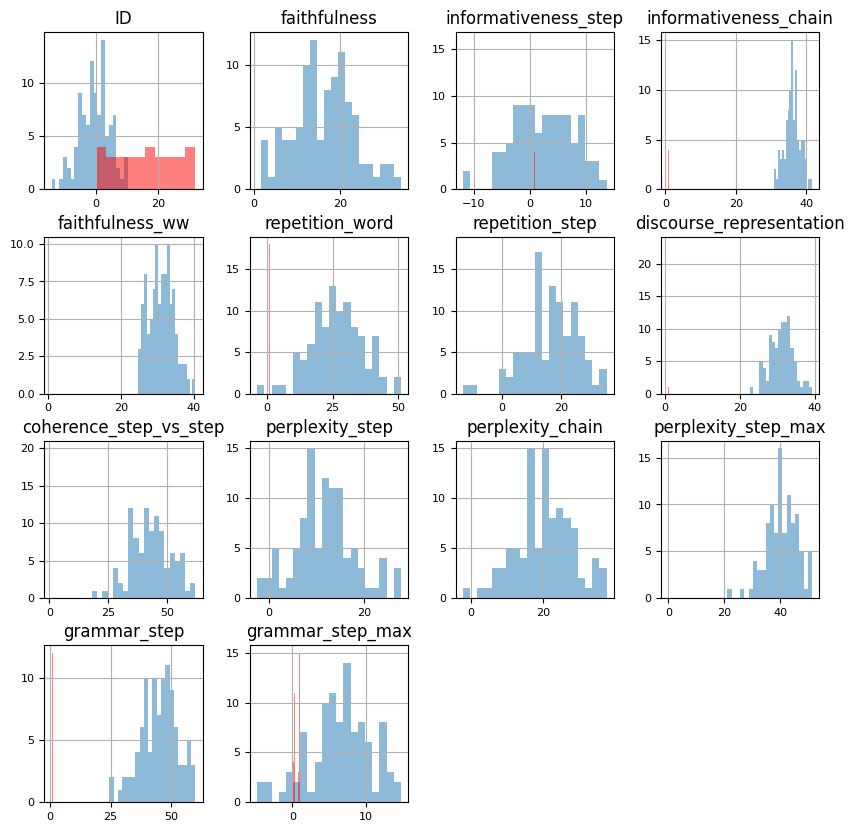

In [124]:
from cProfile import label
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

length=14

loc = np.random.randint(0,50,size=length)
scale = np.random.rand(length)*10
dist = np.random.normal(loc=loc, scale=scale, size=(100,length))



axes = df2.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10), bins=20, alpha=0.5, label='x')

loc = np.random.randint(0,50,size=length)
scale = np.random.rand(length)*10
dist = np.random.normal(loc=loc, scale=scale, size=(100,length))
df2 = pd.DataFrame(data=list(dist))

df_logic.hist(ax=axes.ravel()[:length], layout=(3,7), alpha=0.5, label='x',color='r')

plt.show()

In [112]:
df_commonsense = pd.read_table('scores_MoralMachine_wrong_commonsense.tsv', sep=' ', header=0)
df_commonsense.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.770464,0.770464,0.885232,0.941207,1.000000,1.000000,0.998749,0.998342,0.025947,0.025947,0.025947,0.791996,0.791996
1,1,0.771462,0.771462,0.885731,0.939697,1.000000,1.000000,0.998830,0.998471,0.028395,0.028395,0.028395,0.774984,0.774984
2,2,0.774785,0.774785,0.887392,0.939538,1.000000,1.000000,0.998763,0.998465,0.028438,0.028438,0.028438,0.814786,0.814786
3,3,0.844791,0.867133,0.825020,0.942805,0.074392,0.087251,0.999059,0.960139,0.004416,0.035874,0.000618,0.596297,0.203717
4,4,0.857424,0.879663,0.833617,0.942744,0.072239,0.085654,0.999079,0.960531,0.003779,0.036396,0.000512,0.618190,0.247071


In [113]:
df_correspondence = pd.read_table('scores_MoralMachine_wrong_correspondence.tsv', sep=' ', header=0)
df_correspondence.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.900052,0.900052,0.950026,0.943768,1.0,1.0,0.999274,0.997511,0.028873,0.028873,0.028873,0.907397,0.907397
1,1,0.894897,0.894897,0.947448,0.938698,1.0,1.0,0.999714,0.998126,0.018885,0.018885,0.018885,0.896050,0.896050
2,2,0.882275,0.882275,0.941138,0.946679,1.0,1.0,0.998885,0.997429,0.016613,0.016613,0.016613,0.879277,0.879277
3,3,0.893312,0.893312,0.946656,0.947406,1.0,1.0,0.998897,0.997699,0.020910,0.020910,0.020910,0.931888,0.931888
4,4,0.917709,0.917709,0.958855,0.944569,1.0,1.0,0.999175,0.997621,0.027219,0.027219,0.027219,0.919427,0.919427


In [114]:
df_moral = pd.read_table('scores_MoralMachine_invalid_moral.tsv', sep=' ', header=0)
df_moral.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.910240,0.910240,0.955120,0.944742,1.0,1.0,0.957714,0.997830,0.009863,0.009863,0.009863,0.711891,0.711891
1,1,0.872318,0.872318,0.936159,0.948825,1.0,1.0,0.943899,0.997346,0.011235,0.011235,0.011235,0.830300,0.830300
2,2,0.901879,0.901879,0.950939,0.942138,1.0,1.0,0.966274,0.994672,0.007157,0.007157,0.007157,0.154191,0.154191
3,3,0.895538,0.895538,0.947769,0.943392,1.0,1.0,0.796976,0.997589,0.007115,0.007115,0.007115,0.848524,0.848524
4,4,0.906663,0.906663,0.953332,0.944593,1.0,1.0,0.988645,0.997027,0.006330,0.006330,0.006330,0.588170,0.588170


,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.900052,0.900052,0.950026,0.943768,1.0,1.0,0.999274,0.997511,0.028873,0.028873,0.028873,0.907397,0.907397
1,1,0.894897,0.894897,0.947448,0.938698,1.0,1.0,0.999714,0.998126,0.018885,0.018885,0.018885,0.896050,0.896050
2,2,0.882275,0.882275,0.941138,0.946679,1.0,1.0,0.998885,0.997429,0.016613,0.016613,0.016613,0.879277,0.879277
3,3,0.893312,0.893312,0.946656,0.947406,1.0,1.0,0.998897,0.997699,0.020910,0.020910,0.020910,0.931888,0.931888
4,4,0.917709,0.917709,0.958855,0.944569,1.0,1.0,0.999175,0.997621,0.027219,0.027219,0.027219,0.919427,0.919427
